# Klasterovanje K-Sredina

Klasterovanje spada u nenadgledano ucenje, tj. pronalazimo sablone u podacima. Klasterovanje pronalazi grupe medju podacima tako da su objekti unutar jedne grupe slicniji od bilo kog objekta druge grupe.

## Predprocesiranje

In [29]:
import pandas as pd

df = pd.read_csv('Data/dogs.csv')
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [30]:
X = df.drop('breed', axis=1)
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=['height', 'weight'])
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


## K-sredina

In [32]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, init='k-means++')
k_means.fit(X)

print('Centroids:\n', k_means.cluster_centers_)
print('SSE:\n', k_means.inertia_)

Centroids:
 [[0.36263736 0.16900093]
 [0.79807692 0.65359477]]
SSE:
 0.732128510026434


In [33]:
print(k_means.labels_, len(k_means.labels_))

[0 0 0 1 0 1 1 1 0 0 0] 11


## Posprocesiranje

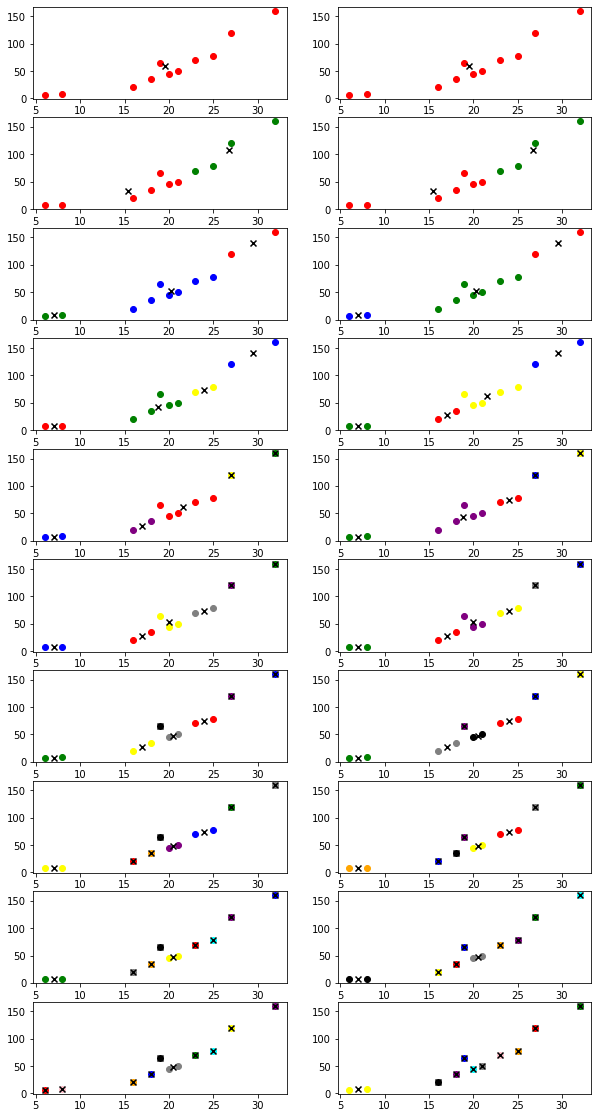

In [38]:
import matplotlib.pyplot as plt

colors = [
    'red', 'green', 'blue', 
    'yellow', 'purple', 'gray', 
    'black', 'orange', 'cyan', 
    'pink', 'brown'
]

ks = range(1, X.shape[0])
init_methods = ['k-means++', 'random']

fig = plt.figure(figsize=(10, 20))
plt_index = 1

sse = []

for k in ks:
    for init_method in init_methods:
        k_means = KMeans(k, init=init_method)
        k_means.fit(X)
        
        df['label'] = k_means.labels_
        
        sse.append(k_means.inertia_)
        
        fig.add_subplot(
            len(ks), 
            len(init_methods), 
            plt_index
        )
        
        for label in range(k):
            claster = df[df['label'] == label]
            plt.scatter(
                claster['height'], 
                claster['weight'], 
                color=colors[label]
            )
            
        centroids = k_means.cluster_centers_
        centroids = pd.DataFrame(scaler.inverse_transform(centroids))
        
        plt.scatter(
            centroids[0],
            centroids[1],
            marker='x',
            color='black'
        )
            
        plt_index += 1

plt.show()

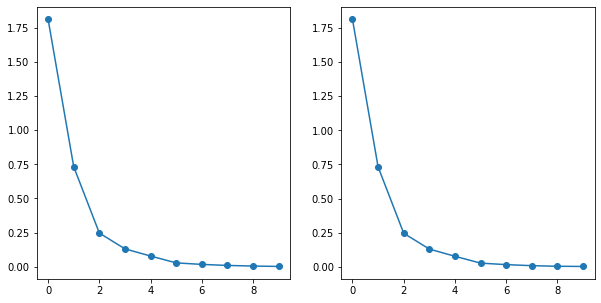

In [42]:
sse_k_meanspp = [err for (i, err) in enumerate(sse) if i % 2 == 0]
sse_random = [err for (i, err) in enumerate(sse) if i % 2 == 1]

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.plot(sse_k_meanspp, marker='o')

fig.add_subplot(1, 2, 2)
plt.plot(sse_random, marker='o')

plt.show()

**Pravilo lakta**: Trazimo najmanji hiperparametar $k$ nakon koga $SSE$ opada sporo.